<a href="https://colab.research.google.com/github/heejjj/Image_Processing_Kor_Univ/blob/Kor_Univ/tf_0422_ku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(100,activation='relu',input_shape=(2,)))

In [ ]:
model.add(Dense(100,activation='sigmoid'))

In [ ]:
model.add(Dense(10,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 11,410
Trainable params: 11,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
layer1 = Dense(100,activation='relu',input_shape=(2,))
layer2 = Dense(50,activation='relu')
layer3 = Dense(10,activation='softmax')

In [ ]:
model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 5,860
Trainable params: 5,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(np.random.randn(100,2)).shape

4/4 [==============================] - 4s 5ms/step


(100, 10)

In [ ]:
model = Sequential(
    [
        layer1,
        layer2,
        layer3
    ]
)

In [ ]:
model.predict(np.random.randn(100,2)).shape

4/4 [==============================] - 0s 4ms/step


(100, 10)

In [ ]:
input_ = Dense(100,activation='relu')

In [ ]:
input_ = Input(shape=(2,))

In [ ]:
layer1 = Dense(100,activation='relu')
layer2 = Dense(50,activation='relu')
layer3 = Dense(10,activation='relu')

In [ ]:
x = layer1(input_)

In [ ]:
x = layer2(x)

In [ ]:
x = layer3(x)

In [ ]:
model = Model(inputs=[input_],outputs=[x])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_7 (Dense)             (None, 100)               300       
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 5,860
Trainable params: 5,860
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [12]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
y_train = to_categorical(y_train)

In [14]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [ ]:
model = Sequential(
    [
        Dense(100,activation='relu',input_shape=(X_train.shape[1]*X_train.shape[2],)),
        Dense(50,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

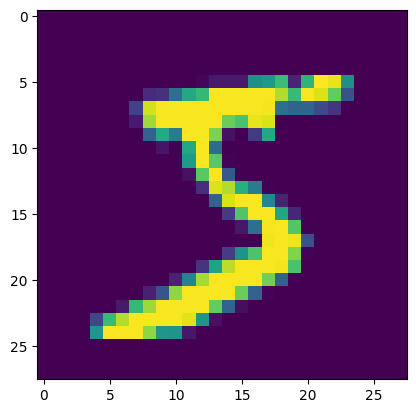

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
y_train[0]

In [ ]:
# (28,28) --> --> --> (10)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = X_train[0].reshape(1,28*28)

In [ ]:
np.argmax(model.predict(x))

1/1 [==============================] - 0s 66ms/step


0

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 20ms/step


array([[1.0000000e+00, 5.6622182e-27, 0.0000000e+00, 0.0000000e+00,
        8.9684157e-25, 0.0000000e+00, 1.5183862e-23, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
y_train[[0]]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.nansum(-y_train[[0]]*np.log(model.predict(x)))

1/1 [==============================] - 0s 19ms/step


<ipython-input-32-9dd79f1a2869>:1: RuntimeWarning: divide by zero encountered in log
  np.nansum(-y_train[[0]]*np.log(model.predict(x)))
<ipython-input-32-9dd79f1a2869>:1: RuntimeWarning: invalid value encountered in multiply
  np.nansum(-y_train[[0]]*np.log(model.predict(x)))


inf

In [ ]:
model.predict(x).shape

1/1 [==============================] - 0s 20ms/step


(1, 10)

In [ ]:
y_train[[0]].shape

(1, 10)

In [ ]:
model.predict(x)[0,5]

1/1 [==============================] - 0s 23ms/step


0.0

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = 'sgd'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
             loss=loss,
             metrics=metrics)

In [ ]:
model.layers[0].get_weights()[0]

array([[ 0.04526092,  0.0379815 ,  0.06884913, ..., -0.01478335,
         0.07189271,  0.07185414],
       [-0.00059137,  0.06355658,  0.00839631, ..., -0.07594129,
         0.02217899,  0.01871701],
       [ 0.04206798, -0.01689027,  0.02318826, ..., -0.06731576,
        -0.07801247,  0.0077268 ],
       ...,
       [ 0.03401357,  0.01136791,  0.04367854, ..., -0.00127413,
        -0.02616509,  0.03871139],
       [ 0.04446468, -0.06833985, -0.0286444 , ...,  0.06015687,
         0.02797242,  0.06599163],
       [ 0.04937325,  0.07857265, -0.04974365, ...,  0.05148263,
         0.06135586, -0.05759388]], dtype=float32)

In [ ]:
X_train = X_train.reshape(-1,28*28)

In [ ]:
model.fit(X_train,
         y_train,
         epochs=10,
         batch_size=100)

Epoch 1/10
600/600 [==============================] - 7s 7ms/step - loss: 68254.5469 - accuracy: 0.1122
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 9/10
600/600 [==============================] - 4s 6ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 10/10
600/600 [==============================] - 3s 4ms/step - loss: 2.3012 - accuracy: 0.

In [ ]:
x = np.random.randn(10,10,3)

In [ ]:
x.reshape(10*10,-1).shape

(100, 3)

In [22]:
from tensorflow.keras.layers import ReLU

In [ ]:
model = Sequential(
    [
        Dense(128,activation='relu',input_shape=(784,)),
        Dense(64),
        ReLU(),
        Dense(10,activation='softmax')
    ]
)

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train_trans = X_train.reshape(-1,28*28)
y_train_trans = to_categorical(y_train)

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train_trans,
         y_train_trans,
         epochs=10,
         batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 9.0236 - accuracy: 0.7348
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.2746 - accuracy: 0.8881
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.9215
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.9414
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.9510
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.2254 - accuracy: 0.9595
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.1815 - accuracy: 0.9652
Epoch 8/10
60/60 [==============================] - 0s 7ms/step - loss: 0.1389 - accuracy: 0.9711
Epoch 9/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1190 - accuracy: 0.9737
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9776


In [ ]:
first = []
for i in range(10):
    first.append(np.argmax(model.predict(X_train[[i]].reshape(1,784))))

1/1 [==============================] - 0s 18ms/step


In [ ]:
first == y_train[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_trans,
         y_train_trans,
         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4653 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3195 - accuracy: 0.9486
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2656 - accuracy: 0.9522
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2472 - accuracy: 0.9556
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2436 - accuracy: 0.9576
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2401 - accuracy: 0.9592
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2347 - accuracy: 0.9600
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2543 - accuracy: 0.9603
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2452 - accuracy: 0.9596
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.245

In [ ]:
second = []
for i in range(10):
    second.append(np.argmax(model.predict(X_train[[i]].reshape(1,784))))

1/1 [==============================] - 0s 28ms/step


In [ ]:
second == y_train[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [20]:
from tensorflow.keras.datasets import cifar10

In [21]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [19]:
from tensorflow.keras.layers import Dense, Flatten, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical

In [ ]:
def to_category(x):
    y_axis = max(x)[0]+1
    x_axis = len(x)
    tmp = np.zeros((x_axis,y_axis))
    for idx,val in enumerate(x):
        tmp[idx,val] = 1
    return tmp

In [ ]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
y_train_trans = to_category(y_train)

In [ ]:
X_train_trans = X_train.reshape(-1,np.cumprod(X_train.shape[1:])[-1])

In [ ]:
X_train_trans.shape, y_train_trans.shape

((50000, 3072), (50000, 10))

In [ ]:
model = Sequential(
    [
        Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
        Dense(1024,activation='relu'),
        Dense(256,activation='relu'),
        Dense(y_train_trans.shape[-1],activation='softmax')
    ]
)

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
model.fit(X_train_trans,
         y_train_trans,
         epochs=10,
         batch_size=512)

Epoch 1/10
98/98 [==============================] - 5s 12ms/step - loss: 214.4470 - accuracy: 0.1522
Epoch 2/10
98/98 [==============================] - 1s 10ms/step - loss: 2.3437 - accuracy: 0.2698
Epoch 3/10
98/98 [==============================] - 1s 10ms/step - loss: 2.6980 - accuracy: 0.2571
Epoch 4/10
98/98 [==============================] - 1s 10ms/step - loss: 1.9378 - accuracy: 0.3302
Epoch 5/10
98/98 [==============================] - 1s 10ms/step - loss: 1.8415 - accuracy: 0.3598
Epoch 6/10
98/98 [==============================] - 1s 9ms/step - loss: 1.8140 - accuracy: 0.3681
Epoch 7/10
98/98 [==============================] - 1s 10ms/step - loss: 1.7610 - accuracy: 0.3831
Epoch 8/10
98/98 [==============================] - 1s 10ms/step - loss: 1.7049 - accuracy: 0.4018
Epoch 9/10
98/98 [==============================] - 1s 13ms/step - loss: 1.6527 - accuracy: 0.4222
Epoch 10/10
98/98 [==============================] - 1s 11ms/step - loss: 1.6433 - accuracy: 0.4249


In [ ]:
layer1 = Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
layer2 = Dense(1024,activation='relu'),
layer3 = Dense(256,activation='relu'),
layer4 = Dense(y_train_trans.shape[-1],activation='softmax')
batchlayer = BatchNormalization()

In [ ]:
model1 = Sequential(
    [
        Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
        Dense(1024,activation='relu'),
        Dense(256,activation='relu'),
        Dense(y_train_trans.shape[-1],activation='softmax')
    ]
)

In [ ]:
model2 = Sequential(
    [
        Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
        BatchNormalization(),
        Dense(1024,activation='relu'),
        BatchNormalization(),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(y_train_trans.shape[-1],activation='softmax')
    ]
)

In [ ]:
model2 = Sequential(
    [
        Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
        BatchNormalization(),
        Dense(1024,activation='relu'),
        BatchNormalization(),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(y_train_trans.shape[-1],activation='softmax')
    ]

)

TypeError: ignored

In [ ]:
model2.layers[0].set_weights(model1.layers[0].get_weights())
model2.layers[2].set_weights(model1.layers[1].get_weights())
model2.layers[4].set_weights(model1.layers[2].get_weights())
nmodel2.layers[6].set_weights(model1.layers[3].get_weights())

In [ ]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model1.compile(optimizer=opt, loss=loss, metrics=metrics)
model2.compile(optimizer=opt, loss=loss, metrics=metrics)

In [ ]:
model1.fit(X_train_trans,
          y_train_trans,
          epochs=10)
model2.fit(X_train_trans,
          y_train_trans,
          epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 21.7657 - accuracy: 0.2573
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9219 - accuracy: 0.3128
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8463 - accuracy: 0.3347
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7857 - accuracy: 0.3585
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7692 - accuracy: 0.3602
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7357 - accuracy: 0.3756
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7143 - accuracy: 0.3826
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6894 - accuracy: 0.3915
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6774 - accuracy: 0.3944
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.

In [ ]:
model1.fit(X_train_trans,
          y_train_trans,
          epochs=10,
          batch_size=1090,
           validation_data=(X_test_trans, y_test_trans))
model2.fit(X_train_trans,
          y_train_trans,
          epochs=10)

NameError: ignored

In [ ]:
model1.evaluate(X_test_trans, y_test_trans)

NameError: ignored

In [ ]:
model2.evaluate(X_test_trans, y_test_trans)

In [ ]:
#Flatten(input_shape=(28,28,3))

model = Sequential(
    [
        Flatten(input_shape = X_train.shape[1:],
                Dense(2028, activation='relu'),
                BatchNormalization(),
                Dense(1024, activation='relu'),
                Dense(512, activation='relu'),
                Dropout(0.5),
                Dense(y_train_trans.shape[-1], activation='softmax')

    ]
)

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.layers[0].get_weights() #0번 layer는  weight이 없음

In [ ]:
model.layers[2].get_weights()[1].size

In [ ]:
#Cov layers 합성곱

In [ ]:
X_train[0]

#X_train[0]/255 =-> scale

In [4]:
def min_max_scale(x):
  r = max(x) - min(x) # 범위
  m = max(x)
  return (x-m)/r 


In [7]:
x= np.array([1,2,3,4])
min_max_scale(x)

array([-1.        , -0.66666667, -0.33333333,  0.        ])

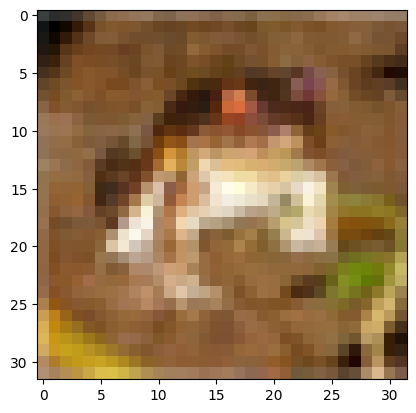

In [23]:
plt.imshow(X_train[0])

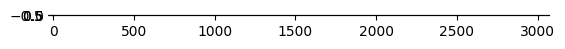

In [24]:
plt.imshow(X_train[0].reshape(1,32*32*3))
#한 곳에 집중하게 해야함 

In [26]:
#Conv 쌓기

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical, pad_sequences
#to_categorical: one-hot
#pad_qequences:: text mining에서 많이 쓰임

In [27]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [29]:
#Conv2D(channel, kernel_size, activation, input_shape)

model = Sequential(
    [
        Conv2D(30, (3,3), activation='relu', input_shape=X_train.shape[1:]),
        MaxPooling2D((3,3))
    ]
)

In [30]:
X_train.shape
#3 차원 데이터가 5만개
#height: 32, width:32

(50000, 32, 32, 3)

In [32]:
 model.summary()

 #32(height),32(width),3(차원) -> 30,30,30(channel) -> 10,10,30(큰 값을 뽑아 maxpooling)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 30)       0         
 )                                                               
                                                                 
Total params: 840
Trainable params: 840
Non-trainable params: 0
_________________________________________________________________


In [33]:
 x = np.arange(1,17).reshape(4,4)
 
 f = np.arange(1,5).reshape(2,2)

In [39]:
f

array([[1, 2],
       [3, 4]])

In [40]:
result  = np.zeros((3,3))
result

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [37]:
result[0.0] = np.sum(x[:2, :2]*f)

IndexError: ignored

In [38]:
result[0.1] = np.sum(x[:2, 1:3]*f)

IndexError: ignored

In [41]:
result[0,2] = np.sum(x[:2, 2:4]*f)

In [42]:
result[0,2] = np.sum(x[:2, 1:3]*f)
result[1,2] = np.sum(x[1:3, :2]*f)
result[2,2] = np.sum(x[2:4, :2]*f)


In [44]:
model = Sequential(
    [
        Conv2D(1, (2,2), input_shape=(4,4,1)),
        MaxPooling2D((2,2))
     
    ]
)

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 3, 3, 1)           5         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 1)          0         
 2D)                                                             
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [46]:
#값에 대해 predict
model.layers

In [47]:
#layer의 값을 바꿈
model.layers[0].get_weights()

[array([[[[0.8471473 ]],
 
         [[0.07629907]]],
 
 
        [[[0.68532914]],
 
         [[0.3309328 ]]]], dtype=float32),
 array([0.], dtype=float32)]

In [48]:
model.layers[0].get_weights()[0].shape
#2x2짜리 -> channel하나를 -> 1로 보냄?

(2, 2, 1, 1)

In [50]:
np.dot(np.arange(1, 17).reshape(1,4,4,1), model.layers[0].get_weights()[0].shape[0])

array([[[[ 2],
         [ 4],
         [ 6],
         [ 8]],

        [[10],
         [12],
         [14],
         [16]],

        [[18],
         [20],
         [22],
         [24]],

        [[26],
         [28],
         [30],
         [32]]]])

In [51]:
np.dot(np.arange(1, 17).reshape(1,4,4,1), model.layers[0].get_weights()[0].shape[0]).shape

(1, 4, 4, 1)

In [52]:
X_train[0:1].shape

(1, 32, 32, 3)

In [54]:
X_train[[0]].shape

(1, 32, 32, 3)

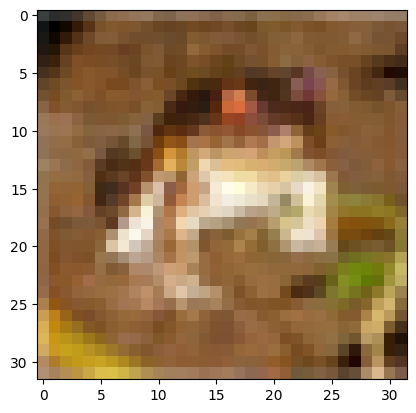

In [56]:
plt.imshow(X_train[0])

In [68]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [74]:
X_train.shape

(50000, 32, 32, 3)

In [75]:
 X_train.shape[1:]

(32, 32, 3)

In [106]:
# BatchNormalization()깔아주는것을 추천 

model = Sequential(
    [
        Conv2D(100, (3, 3), activation='relu', input_shape = X_train.shape[1:]),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Conv2D(50,(2,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(256, activation='relu'), 
        Dense(y_train.shape[1], activation='softmax')
    ]
)
    #직사각형이미지가 들어갈 수는 있지만, 정사각형이미지로 잘라서 넣어주는게 일반적

In [107]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,
          y_train, 
          epochs = 10,
          batch_size =512,
          validation_data = (X_test, y_test))

Epoch 1/10
98/98 [==============================] - 14s 34ms/step - loss: 1.5839 - accuracy: 0.4531 - val_loss: 1.6483 - val_accuracy: 0.4524
Epoch 2/10
98/98 [==============================] - 3s 29ms/step - loss: 1.1568 - accuracy: 0.5946 - val_loss: 1.8272 - val_accuracy: 0.4196
Epoch 3/10
98/98 [==============================] - 4s 37ms/step - loss: 1.0099 - accuracy: 0.6437 - val_loss: 1.4135 - val_accuracy: 0.5360
Epoch 4/10
98/98 [==============================] - 3s 31ms/step - loss: 0.9024 - accuracy: 0.6817 - val_loss: 1.2191 - val_accuracy: 0.5883
Epoch 5/10
98/98 [==============================] - 3s 30ms/step - loss: 0.8299 - accuracy: 0.7093 - val_loss: 1.0840 - val_accuracy: 0.6329
Epoch 6/10
98/98 [==============================] - 3s 28ms/step - loss: 0.7639 - accuracy: 0.7310 - val_loss: 1.1627 - val_accuracy: 0.6130
Epoch 7/10
98/98 [==============================] - 3s 36ms/step - loss: 0.7141 - accuracy: 0.7489 - val_loss: 1.0471 - val_accuracy: 0.6374
Epoch 8/10
9

In [ ]:
"""
model = Sequential()
#Defining layers of the model
model.add(Flatten(input_shape=(32,32,3)) # 32*32*3 = 3072

model.add(Dense(2056, activation='relu'))
model.add(Dense(10, activation='softmax')) """

In [81]:
model.predict(X_train[[0]]).shape

ValueError: ignored

In [82]:
x = model.predict(X_rain[[0]])

NameError: ignored

In [83]:
x = x.reshape(10,10,30)

ValueError: ignored

In [85]:
#데이터의 합
np.sum(x, axis =2)

AxisError: ignored

In [84]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

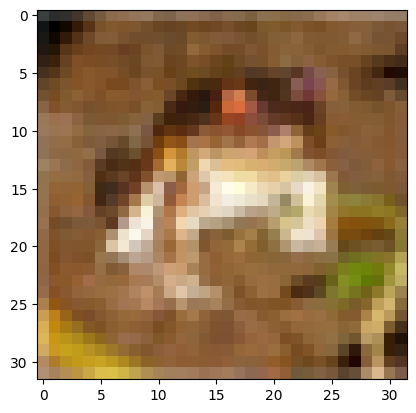

In [60]:
plt.imshow(x/np.max(x)) 
#개구리에서-> 바뀜 
plt.imshow(X_train[0])

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

In [ ]:
plt.imshow(X_train[0])

In [86]:
x.reshape(10*10)

ValueError: ignored

In [ ]:
np.sum(x, axis =2).shape 
#10*10

In [87]:
x.shape

(4, 4)

In [58]:
plt.imshow(x/max(x))

ValueError: ignored

In [88]:
x = np.arange(1, 17).reshape(4,4)

In [89]:
f = np.arange(1, 5).reshape(2,2)

In [96]:
(_,y),(_,_) = cifar10.load_data()
#6번값이 개구리 

In [101]:
import pandas as pd

flog = pd.DataFrame(y)[y==6].index[:10]

In [105]:
flog

Int64Index([0, 19, 22, 23, 25, 72, 95, 103, 104, 117], dtype='int64')

In [98]:
y.shape

(50000, 1)

In [97]:
y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [102]:
X_train[flog, :][0].reshape((32,32,3))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [104]:
np.argmax(model.predict(X_train[flog, :]), axis =1 ) 

ValueError: ignored

In [ ]:
#몇 개 맞췄는지 퍼센트로 보기
np.sum(np.argmax(model.predict(X_train[flog, :]), axis =1 ) == 6 ) / flog.size

In [ ]:
for i in flog:
  plt.imshow(X_train[i])
  #몇번 예측했는지
  print(np.argmax(model.predict(X_train[i, :])))
  plt.show()


In [ ]:
#7번 이미지가 뭐길래 
plt.imshow(X_train[7])
#말

In [ ]:
#9번 이미지가 뭐길래 
plt.imshow(X_train[9])
#트럭 ㅋㅋ

# Cat& Dog Prediction Model

In [ ]:
# dataset 
#https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [161]:
import cv2
import os
from PIL import Image

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_list_dog  = /content/drive/MyDrive/data/PetImages/Cat

In [108]:
from glob import glob

In [123]:
! dir

kagglecatsanddogs_5340.zip  sample_data


In [124]:
base_dir = 'petimages'

In [146]:
#file_list_dog = glob('petimages/ Dog/*.jpg')[:500]
file_list_dog = glob('C:/Users/KOREA/Downloads/petimage/PetImages/Dog/*.jpg')[:500]
#"C:\Users\KOREA\Downloads\petimages"
#500r개만 가져오기 

In [147]:
file_list_dog

[]

In [164]:
#파일 불러오기(cat)
data=[]
paths=[]
labels=[]
for r,d,f in os.walk("/content/drive/MyDrive/data/PetImages/Cat"):
    for file in f:
        if ".jpg" in file:
            paths.append(os.path.join(r,file))
for r,d,f in os.walk("/content/drive/MyDrive/data/cat"):
    for file in f :
        if ".jpg" in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = np.array(img)


for path in paths:
    img=Image.open(path)
    img=img.resize((150,150))
    img = np.array(img)
    if(img.shape == (150,150,3)):
        data.append(np.array(img))
        labels.append(1)

In [165]:
#파일 불러오기(dog)
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/data/PetImages/Dog"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for r, d, f in os.walk(r"/content/drive/MyDrive/data/Dog"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))


for path in paths:
    img=Image.open(path)
    img=img.resize((150,150))
    img = np.array(img)
    if(img.shape == (150,150,3)):
        data.append(np.array(img))
        labels.append(0)
data = np.array(data)
data.shape

(3408, 150, 150, 3)

In [ ]:
# Define the path to the dataset
IMG_PATH = '/content/drive/MyDrive/data/PetImage/'

# Create a list of all the image filenames
all_images = []
for folder in ['Cat', 'Dog']:
    folder_path = os.path.join(IMG_PATH, folder)
    for filename in os.listdir(folder_path):
        
         all_images.append(os.path.join(folder_path, filename))

# Create a list of corresponding labels (0 for 'no', 1 for 'yes')
labels = [1 if 'Y' in filename else 0 for filename in all_images]

# Split the dataset into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(all_images, labels, test_size=0.03, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=123)

# Print the sizes of the resulting datasets
print(f'Train set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

In [145]:
#file_list_cat = glob('petimages/Cat/*.jpg')[:500]
file_list_cat = glob('C:/Users/KOREA/Downloads/petimage/PetImages/Cat/*.jpg')[:500]

In [148]:
file_list = np.concatenate([file_list_cat, file_list_dog], axis=0)

In [149]:
file_list

array([], dtype=float64)

In [141]:
X = np.zeros((len(file_list), 150, 150,3))
y = []

for idx, file in enumerate(file_list):
  f = plt.imread(file)
  f = cv2.resize(f,(150,150))
  if f.shape[-1] > 3:
    f = f[:,:,:3]
  X[idx] = f
  #cat 0. dpg 1로 분류하기
  if 'Cat' in file:
    y.append(0)
  else:
    y.append(1)

y = np.array(y)

In [142]:
X.shape

(0, 150, 150, 3)

In [143]:
y.shape

(0,)

In [ ]:
y = y.reshape(-1. 1)

In [151]:
model = Sequential(
    [
        Conv2D(50. (3,3), activation = 'relu', input_shape=(150,150,3)),
        MaxPooling2D(5,5),
        Conv2D(30,(2,2), activation='relu'),
        MaxPooling2D(7,7),
        Conv2D(20,(2,2), activation='relu'),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation ='sigmoid') 

    ]
)

# 현 모델은 고양이냐 강아지냐가 아니라, 고양이냐 -> sigmoid 

<>:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<ipython-input-151-9627f79147f4>:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  Conv2D(50. (3,3), activation = 'relu', input_shape=(150,150,3)),


TypeError: ignored

In [152]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 100)       2800      
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 100)      400       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 100)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 8, 50)          30050     
                                                                 
 batch_normalization_6 (Batc  (None, 9, 8, 50)         200       
 hNormalization)                                                 
                                                      

In [ ]:
opt ='adam'
loss = 'binary_crossentropy'
model.compile(optimizer=opt, loss=loss, matrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs = 50)

In [154]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
opt ='adam'
loss = 'binary_crossentropy'
model.compile(optimizer=opt, loss=loss, matrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

In [ ]:
plt.imshow(X_trian[0], )

In [ ]:
np.where(model.predict(X_train[[0]]> 0.5, 'Dog', 'Cat')[0])

In [ ]:
np.where(model.predict(X_train[[0]]> 0.5, 'Dog', 'Cat')[0][0])

In [ ]:
plt.imshow((X_test[0].astype(int)))

In [ ]:
np.where(model.predict(X_test[[0]]> 0.5, 'Dog', 'Cat')[0][0])

In [ ]:
plt.imshow(X_trian[0], )

In [125]:
dt = plt.imread(file_list_cat[0])

IndexError: ignored

In [ ]:
X = np.zros((len(file_list), 150,150,3)
y = []
id_ = []

for idx, file i enumerate(file_list):
  try:
    f = plt.imread(file)
    f =cv2.resize(f, (150,150))
    if f.shape[-1] > 3 :
      f = f[:,:,:3]
    X[idx] = f
    if 'Cat' in file:
      y.append(0)
    else:
      y.append(1)
  except:
    id_.append(idx)

y = np.array(y)

In [ ]:
pd.Series(file_list).index

In [ ]:
pd.Series(file_list).isin(id_)
#T, F 

In [ ]:
np.array(file_list)[~pd.Series(file_list).isin(id_)])

In [ ]:
pd.Series(file_list).index.isin(id_)
#3

In [ ]:
file_list = np.array(file_list)[pd.Series(file_list).index.isin(id_)]

In [ ]:
len(file_list)

In [ ]:
y = np.array(y)

In [ ]:
y = y.reshape(-1,1)

In [ ]:
X.shape
#10000, 150, 150, 3

In [ ]:
y.shape
#9997, 3

In [157]:
#마지막 3개를 지운다 
X[:-3,:,:]

array([], shape=(0, 150, 150, 3), dtype=float64)

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy')

model.compile(optimizer = opt, loss = loss, metrics =['accuracy'])


In [ ]:
index = np.random.choice(np.arange(len(X)), len(X), replacbe= False)

In [ ]:
index.size*0.8

In [ ]:
tr_ind = index[:int()index.size*0.8)]
te_ind - index[int(index.size*0.8):]

In [ ]:
X_train

In [ ]:
#@title
#!mkdir /content/drive/MyDrive/dev/project1/dataset
#!unzip -qq /content/drive/MyDrive/dev/project1/dataset.zip -d /content/drive/MyDrive/dev/project1/dataset

In [155]:
#@title
#!unzip -qq <압축 파일 경로> -d <원하는 위치 경로>  
!unzip -qq /content/kagglecatsanddogs_5340.zip/ -d /content/petimage

unzip:  cannot find or open /content/kagglecatsanddogs_5340.zip/, /content/kagglecatsanddogs_5340.zip/.zip or /content/kagglecatsanddogs_5340.zip/.ZIP.


In [ ]:
#@title
from google.colab import files
files.upload()

In [ ]:
x1 = plt.imread(file_list_dog[0]) #하나씩 묶기 
x2 = plt.imread(file_list_dog[1])

In [ ]:
x1.shape 
#image별 shape이 다름 

In [ ]:
#shape통일해주기 
x = cv2.resize(x1,(150,150))

In [ ]:
x.shape

In [128]:
#list 두개를 묶기 

ㅣ = []

for file in file_list_dog:
  ㅣ.append(cv2.resize(plt.imread(file), (150, 150)))

In [ ]:
l[0].shape 

In [ ]:
l[2].shape

In [131]:
dt = np.zeros((500,150,150,3))

for file in file_list_dog:
  tmp = cv2.resize(plt.imread(file), (150,150))
  ㅣ.append(cv2.resize(plt.imread(file), (150, 150)))

In [132]:
tmp = cv2.resize(plt.imread(file), (150,150))

NameError: ignored

In [ ]:
dt = np.zeros((500,150,150,3))

for idx, file in enumerate(file_list_dog):
  dt[idx] = cv2.resize(plt.imread(file), (150, 150)))
  if tmp.shape[-1] ==4:
    tmp p tem[:, :, :3] #chanel RGB에서 3까지만 가져옴, 마지막은 투명도